In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, Series

In [2]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in xrange(n)])

tickers = np.array([rands(5) for _ in xrange(N)])
tickers

array(['VTKGN', 'KUHMP', 'XNHTQ', 'GXZVX', 'ISXRM', 'CLPXZ', 'MWGUO',
       'ASKVR', 'AMWGI', 'WEOGZ', 'ULCIN', 'YCOSO', 'VOZPP', 'LPKOH',
       'EEPRM', 'CTWYV', 'XYOKS', 'HVWXP', 'YPLRZ', 'XUCPM', 'QVGTD',
       'FUIVC', 'DSBOX', 'NRAQP', 'OKJZA', 'AYEDF', 'UYALC', 'GFQJE',
       'NBCZF', 'JTVXE', 'RZBRV', 'IGPLE', 'MKONI', 'JVGOA', 'TIBHG',
       'YJHJY', 'QQSKK', 'QAFIG', 'QJWOK', 'KSKRB', 'LGENM', 'OTWMI',
       'MVWVE', 'ZQCSZ', 'KRIFS', 'AVNCD', 'QWHZC', 'WKCHL', 'UWDNQ',
       'JWHAB', 'ROYYX', 'BTSRS', 'XQJNF', 'PADIU', 'SIQBE', 'ZHKOH',
       'MGBEN', 'BKIKC', 'XMVZI', 'MSLHT', 'XXQJZ', 'QBCTB', 'AKNLM',
       'PRKJZ', 'GULJB', 'WSXLR', 'DKFBY', 'FDFJO', 'DZZDK', 'RWMXI',
       'MMRFP', 'FIZXV', 'ADGUV', 'PSUBC', 'WBFBA', 'VIEDR', 'ZNXNO',
       'RUTZT', 'XFNPV', 'MUKPW', 'URAEN', 'GBWYH', 'KVBQD', 'HVBAK',
       'MWSRD', 'ZKPKB', 'MDAQQ', 'COJJU', 'MWPMQ', 'IDRQU', 'DXUXW',
       'RVNUE', 'ULTLU', 'BBYMX', 'YROFC', 'VXUSK', 'HCLOX', 'YKCUT',
       'ALRAX', 'ZSC

In [3]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

# 因子加权和以及噪声
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
             index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                   index=ticker_subset)
factors.corrwith(port)

f1    0.416251
f2   -0.675152
f3    0.172357
dtype: float64

In [4]:
pd.ols(y=port, x=factors).beta

d:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


f1           0.708864
f2          -1.126909
f3           0.293945
intercept    0.468473
dtype: float64

In [6]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                   name='industry')

In [5]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [7]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

d:\Anaconda2\lib\site-packages\pandas\core\groupby.py:647: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  return func(g, *args, **kwargs)


,f1,f2,f3,intercept
industry,,,,
FINANCIAL,0.698325,-1.126663,0.301673,0.473768
TECH,0.719532,-1.127088,0.285383,0.463413


In [8]:
import pandas.io.data as web
data = web.get_data_yahoo('SPY', '2006-01-01', '2012-07-27')
data

d:\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,125.190002,127.000000,124.389999,126.699997,73256700,102.136154
2006-01-04,126.860001,127.489998,126.699997,127.300003,51899600,102.619834
2006-01-05,127.150002,127.589996,126.879997,127.379997,47307500,102.684320
2006-01-06,128.020004,128.580002,127.360001,128.440002,62885900,103.538818
2006-01-09,128.419998,129.059998,128.380005,128.770004,43527400,103.804841
2006-01-10,128.389999,128.979996,128.259995,128.899994,44960800,103.909629
2006-01-11,129.020004,129.440002,128.729996,129.309998,49598900,104.240143
2006-01-12,129.080002,129.279999,128.440002,128.800003,40509200,103.829023
2006-01-13,128.570007,128.899994,128.199997,128.679993,44856700,103.732280


In [16]:
px = data['Adj Close']
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    #first_loc = max(index.notnull().argmax() - 1, 0)
    #index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = pd.rolling_sum(rets, lookback, min_periods=lookback - 5)
    return signal.shift(lag)

In [14]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').resample('B').ffill()
trade_rets = trade_friday.shift(1) * returns
trade_rets

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=95,window=100,center=False).sum()
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


Date
2006-01-03             NaN
2006-01-04             NaN
2006-01-05             NaN
2006-01-06             NaN
2006-01-09             NaN
2006-01-10             NaN
2006-01-11             NaN
2006-01-12             NaN
2006-01-13             NaN
2006-01-16             NaN
2006-01-17             NaN
2006-01-18             NaN
2006-01-19             NaN
2006-01-20             NaN
2006-01-23             NaN
2006-01-24             NaN
2006-01-25             NaN
2006-01-26             NaN
2006-01-27             NaN
2006-01-30             NaN
2006-01-31             NaN
2006-02-01             NaN
2006-02-02             NaN
2006-02-03             NaN
2006-02-06             NaN
2006-02-07             NaN
2006-02-08             NaN
2006-02-09             NaN
2006-02-10             NaN
2006-02-13             NaN
                  ...     
2012-06-18    4.884083e-05
2012-06-19    2.437373e-04
2012-06-20   -4.085278e-05
2012-06-21   -5.654241e-04
2012-06-22    1.940706e-04
2012-06-25   -4.222074e

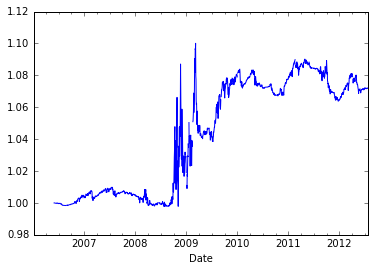

In [17]:
to_index(trade_rets).plot()

In [43]:
vol = returns.rolling(250, min_periods=200).std() * np.sqrt(250)

def sharpe(rets, ann=250):
    return rets.mean() / rets.std() * np.sqrt(ann)

trade_rets = trade_rets.reindex(vol.index, method='ffill')
len(vol) - len(trade_rets)


0

In [44]:
trade_rets.groupby(pd.qcut(vol, 4)).agg(sharpe)

Adj Close
[0.0954, 0.16]   -0.012380
(0.16, 0.188]     0.278561
(0.188, 0.231]   -0.325216
(0.231, 0.457]    0.525923
Name: Adj Close, dtype: float64